<a href="https://colab.research.google.com/github/Zaedul-Islam/Machine_Learning_Projects/blob/master/Cereal/Cereal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hierarchical Clustering on Cereal Data**

## **Importing the libraries**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **Reading 'cereal' dataset**

In [81]:
filepath = '/content/drive/My Drive/Colab Notebooks/Cereal/Dataset/cereal-updated.csv'
dataset = pd.read_csv(filepath)

dataset.head()

,Cereals,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6,280.0,25,3,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8,135.0,0,3,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5,320.0,25,3,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0,330.0,25,3,93.704912
4,Almond_Delight,110,2,2,200,1.0,14.0,8,NaN,25,3,34.384843


In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cereals   77 non-null     object 
 1   calories  77 non-null     int64  
 2   protein   77 non-null     int64  
 3   fat       77 non-null     int64  
 4   sodium    77 non-null     int64  
 5   fiber     77 non-null     float64
 6   carbo     77 non-null     float64
 7   sugars    77 non-null     int64  
 8   potass    75 non-null     float64
 9   vitamins  77 non-null     int64  
 10  shelf     77 non-null     int64  
 11  rating    77 non-null     float64
dtypes: float64(4), int64(7), object(1)
memory usage: 7.3+ KB


**Findings:**
1.  The *cereal* dataset contains 12 columns and 77 rows, but no missing values.


## **Questions & Answers**

### 1. Is a strong correlation between dietary fiber and potassium?

1. Plotting *fiber* in x-axis and *potass* in y-axis of a Scatter Diagram

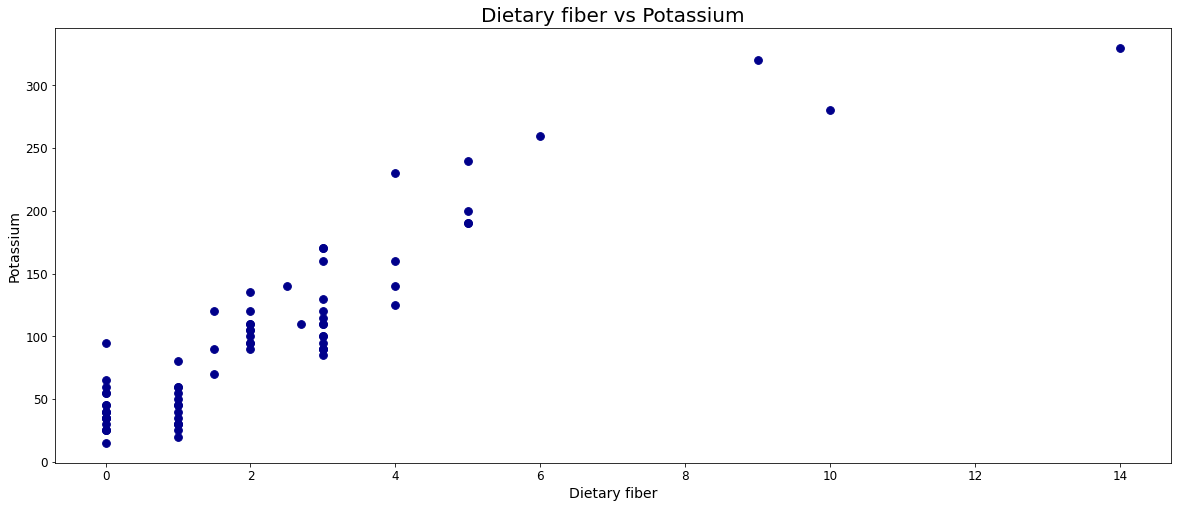

In [83]:
dataset.plot(x = 'fiber', y = 'potass', kind = 'scatter', figsize = (20, 8), title = 'Dietary fiber vs Potassium', fontsize = 12, c = 'DarkBlue',  s = 60)

plt.xlabel('Dietary fiber', fontsize = 14)
plt.ylabel('Potassium', fontsize = 14)
plt.rcParams['axes.titlesize'] = 20

# To show the Scatter Diagram
plt.show()
